## Building Predictors- Homework 4

Author: Kriti Shrivastava (Spire ID: 31041848)

Datasource: Typical  food frequency questionnaire with additional demographics and computed food content for anonymized data for 54 anonymized individuals and over 1000 variables.

#### Task Description: 
Analyze the data. Build predictor. Explore the model using interactive visualizations. Express the predictors using sentences that all can understand (like having a cat and eating bagels often decreases your chances of having heart disease).  
Example of models are clustering, correlation analyses, regression, etc.


###### Bokeh Version used: 0.12.6

    Importing necessary packages

In [191]:
from bokeh.plotting import figure, output_notebook, show
import os
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.layouts import row as Row
from bokeh.layouts import column
from bokeh.models import HoverTool, CustomJS
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Select
from pandas import *
import numpy as np
from bokeh.models import HoverTool, CustomJS,BoxZoomTool, ResetTool, BoxSelectTool, LassoSelectTool
from scipy.stats.stats import pearsonr
import itertools
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.core.properties import value
from bokeh.models.ranges import FactorRange
from bokeh.models.widgets import RadioGroup
import math

%matplotlib inline 
sns.set(style="white")
warnings.filterwarnings('ignore')

#### Data preprocessing:
As a preprocessing step, the column values are converted to integers. 'Yes' has been replaced by 1, 'No' has been replaced by 0, 'Innie' has been replaced by 1 and 'Outie' has been replaced by 0.

In [10]:
path = os.getcwd()
path = path + '\data\\nutrition_raw_anonymized_data_int.csv'

data = pandas.read_csv(path)
source = ColumnDataSource(data)

path = os.getcwd()
path = path + '\data\\nutrition_raw_anonymized_data_int_colors.csv'
data_colors = pandas.read_csv(path)
source_colors = ColumnDataSource(data_colors)

output_notebook()

Loading BokehJS ...

In [115]:
# Percentage of people suffering from each disease 
bar_data = [
    ['Cancer', 'Yes', 28],
    ['Cancer', 'No', 26],
    ['Diabetes', 'Yes', 15],
    ['Diabetes', 'No', 39],
    ['Heart Disease', 'Yes', 20],
    ['Heart Disease', 'No', 34],

]

hover = HoverTool(tooltips=[
    ("Disease Type", "@x")
])

bar_df = pd.DataFrame(bar_data, columns=['disease', 'category', 'count'])
pt = bar_df.pivot('disease', 'category', 'count')
pt = pt.cumsum(axis=1)

bar_p = figure(title="Total people suffering", x_axis_label='Type of Disease', y_axis_label='Count',
           x_range = FactorRange(factors=list(pt.index)),
           plot_height=300, plot_width=500, tools=[hover,BoxSelectTool(),LassoSelectTool(), ResetTool()])
bar_p.vbar(x=pt.index, bottom=0, top=pt.Yes, width=0.2, color='#3cb44b', legend='No')
bar_p.vbar(x=pt.index, bottom=pt.Yes, top=pt.No, width=0.2, color='#e6194b', legend='Yes')
show(bar_p)

#### Correlation Analysis
Analyzing correlation between all the columns in the dataset. Finding Pearson correlation coefficient and the p-value for testing non-correlation between the columns.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

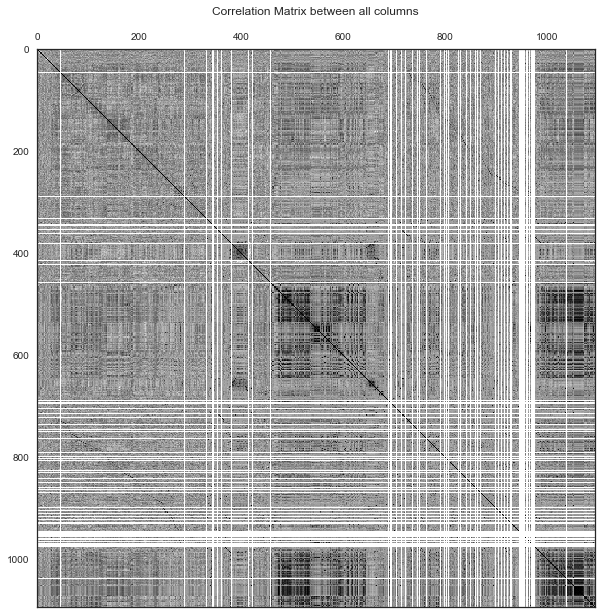

In [320]:
# Creating correlation matrix plot to get the general idea of the data
plt.figure(figsize=(10,10))
plt.matshow(data.corr(), fignum=1)
plt.title("Correlation Matrix between all columns")

# Generate a mask for the upper triangle
# corr = data.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(8, 8))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# # sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),xticklabels=int, yticklabels=int,cbar=False, cmap=sns.diverging_palette(220, 10, as_cmap=True),
# #             square=True, ax=ax)
# print("Correlation Matrix between all columns")
# heatmap_plot = sns.heatmap(corr,cmap=cmap, center=0,cbar=False, xticklabels=False, yticklabels=False,
#             square=True)

The intention of this visualization is only to get a general idea of correlation between various features. Creating a static plot for correlation matrix is faster in matplotlib. Since interaction was not the goal, a matplotlib plot was chosen over a Bokeh visualization. 

In [13]:
correlations = {}
# Getting list of columns
columns = data.columns.tolist()

# Finding correlation between all combinations of columns
for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(data.loc[:, col_a], data.loc[:, col_b])

result = pandas.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result)
# Writing result to a file
path = os.getcwd()
path = path + "\\data\\correlation.csv"
result.to_csv(path)


                                        PCC       p-value
ID__cancer                        -0.173268  2.102195e-01
ID__diabetes                      -0.116972  3.995913e-01
ID__heart_disease                 -0.065516  6.378649e-01
ID__belly                         -0.096545  4.873794e-01
ID__ever_smoked                   -0.123745  3.726654e-01
ID__currently_smoke               -0.135084  3.301031e-01
ID__smoke_often                    0.053074  7.030867e-01
ID__smoke_rarely                  -0.214697  1.189924e-01
ID__never_smoked                   0.123745  3.726654e-01
ID__quit_smoking                  -0.043077  7.571034e-01
ID__left_hand                      0.081377  5.585629e-01
ID__right_hand                    -0.021327  8.783403e-01
ID__readingMath                   -0.049096  7.244257e-01
ID__mathReading                   -0.063866  6.463733e-01
ID__favCable                      -0.131986  3.414171e-01
ID__unfavCable                     0.153416  2.680504e-01
ID__neutralCab

The result above calculates correlation coefficients between all columns. Irrelevant values like correlation with the column ID does not make sense and will be removed from analysis.

#### Finding highly correlated columns

In [93]:
# Finding columns with perfect positive correlation co-effiencent
positive_correlation = list()
for row in result.itertuples():
    if(row.PCC==1):    
        positive_correlation.append(row)

print("Exact Positive Linear Relationship: \n")
for row in positive_correlation:
    print(row.Index, row.PCC)

# Finding columns with perfect negative correlation co-effiencent
negative_correlation = list()
for row in result.itertuples():
    if(row.PCC==-1):    
        negative_correlation.append(row)
        
print("\n\nExact Negative Linear Relationship: \n")
print(negative_correlation)

Exact Positive Linear Relationship: 

APPLEJACKSTYPE__COOKINGFATSOFTTUBMARG 1.0
APPLEJACKSTYPE__GROUP_APPLE_JACKS_COOKIE_CRISP_TOTAL_GRAMS 1.0
CAPNCRUNCHTYPE__GROUP_CAP_N_CRUNCH_TOTAL_GRAMS 1.0
CHEXOTHERTYPE__LIFETYPE 1.0
CHEXOTHERTYPE__FLAXHEMPSEEDOILTYPE 1.0
CHEXOTHERTYPE__GROUP_CHEX_OTHER_TOTAL_GRAMS 1.0
CINNTOASTCRTYPE__GROUP_CINNAMON_TOAST_CRUNCH_TOTAL_GRAMS 1.0
CINNTOASTCRTYPE__GROUP_CAKE_LOW_SUGAR_TOTAL_GRAMS 1.0
CINNTOASTCRTYPE__GROUP_LATTE_CAPPUCCI0_0N_FAT_MILK_TOTAL_GRAMS 1.0
LIFETYPE__FLAXHEMPSEEDOILTYPE 1.0
LIFETYPE__GROUP_CHEX_OTHER_TOTAL_GRAMS 1.0
SPECIALKFLAVSTYPE__GROUP_SPECIAL_K_FLAVORS_TOTAL_GRAMS 1.0
OTHERFIBERCEREALTYPE__GROUP_OTHER_FIBER_CEREAL_TOTAL_GRAMS 1.0
COOKINGFATHALF__GROUP_COOK_FAT_BUTTER_MARGARINE_BLEND_TOTAL_GRAMS 1.0
COOKINGFATSOFTTUBMARG__GROUP_APPLE_JACKS_COOKIE_CRISP_TOTAL_GRAMS 1.0
COOKINGFATLOWFATMARG__GROUP_COOK_FAT_MARGARINE_LOW_FAT_TOTAL_GRAMS 1.0
COOKINGFATLARD__GROUP_COOK_FAT_ANIMAL_FAT_TOTAL_GRAMS 1.0
COOKINGFATOTHER__GROUP_COOK_FAT_OTHER_OIL

#### Analysis: 
This makes sense because, 'never_smoked' and 'ever_smoked' are opposite behaviors, mutually exclusive. This suggests that our model is behaving as expected. 
In general if value for one of these features is known, the other can be predicted. Therefore, one of these features can be dropped without losing a lot of information. This will help us in deciding the features to be used while predicting the target feature.

In [90]:
pos_correlation = list()
for row in positive_correlation:
        column1,column2 = row.Index.split("__")
        new_row = list()
        new_row.append(column1)
        new_row.append(column2)
        pos_correlation.append(new_row)

In [102]:
color_heart_disease = list()
color_diabetes = list()
color_cancer = list()
color_disease = list()
for c in data['heart_disease']:
    if c == 1:
        color_heart_disease.append("#e6194b")
    else:
        color_heart_disease.append("#3cb44b")
for c in data['diabetes']:
    if c == 1:
        color_diabetes.append("#e6194b")
    else:
        color_diabetes.append("#3cb44b")
for c in data['cancer']:
    if c == 1:
        color_cancer.append("#e6194b")
    else:
        color_cancer.append("#3cb44b")
for row in data.itertuples():
    if(row[2] ==1 or row[3] == 1 or row[4] == 1):
        color_disease.append("#e6194b")
    else:
        color_disease.append("#3cb44b")

color_data = {
    'cancer': color_cancer,
    'diabetes': color_diabetes,
    'heart_disease': color_heart_disease,
    'all_disease': color_disease,
    'x': source.data[continuous_pos[1][0]],
    'y': source.data[continuous_pos[1][1]],
    'Color': color_cancer
}    

color_source = ColumnDataSource(data=color_data)

callback =  CustomJS(args=dict(color_source=color_source), code="""
        var selected_color = cb_obj.active;
        var color_data = color_source.data;
        if(selected_color == '3')
            color_data['Color'] = color_data['all_disease'];
        if(selected_color == '0')
            color_data['Color'] = color_data['cancer'];
        if(selected_color == '1')
            color_data['Color'] = color_data['heart_disease'];
        if(selected_color == '2')
            color_data['Color'] = color_data['diabetes'];
        color = color_data['Color']
        color_source.change.emit();
    """)

from bokeh.models import LinearAxis
xaxis = LinearAxis(axis_label="F_TOTAL")
yaxis = LinearAxis(axis_label="PSFRUIT")

callback_axis =  CustomJS(args=dict(source_colors=source_colors, xaxis=xaxis, yaxis=yaxis, color_source=color_source), code="""
        debugger;
        var selected_axis = cb_obj.value;
        var color_data = color_source.data;
        var source_data = source_colors.data;
        var res = selected_axis.split(" vs ");
        color_data['x']=source_data[res[0]];
        color_data['y']=source_data[res[1]];
        x = color_data['x']
        y = color_data['y']
        xaxis.axis_label = res[0];
        yaxis.axis_label = res[1];
        color_source.change.emit();
    """)

print("Select parameter for clustering: ")
radio_group = RadioGroup(
        labels=['Cancer','Heart Disease','Diabetes',"Any disease",], active=0,name="Cluster using: ", callback=callback)
select = Select(title="Choose Axis:", value="F_TOTAL vs PSFRUIT", options=axis_options, callback=callback_axis)

# Finding correlated columns with more than 2 values (continuous and not 0/1)
continuous_pos = list()
axis_options = list()
for i in range(len(pos_correlation)):
    if len(set(source.data[pos_correlation[i][0]])) > 2 or len(set(source.data[pos_correlation[i][1]])) > 2:
        new_row = list()
        new_row.append(pos_correlation[i][0])
        new_row.append(pos_correlation[i][1])
        continuous_pos.append(new_row)
        axis_options.append(str(pos_correlation[i][0])+' vs '+str(pos_correlation[i][1]))
        
# Plot graph
p1 = figure(plot_width=500, plot_height=500, title="Clustering using disease type in perfect positive correlated columns")
p1.scatter(y='y', x='x', source=color_source, color='Color')
p1.xaxis.visible = None
p1.yaxis.visible = None
p1.add_layout(xaxis, 'below')
p1.add_layout(yaxis, 'left')
layout=Row(column(radio_group, select),p1)
show(layout)

Select parameter for clustering: 


#### Exploratory Analysis:
Note: The following analysis is done using only perfect positive correlated columns/features. By varying the threshold(ex. from +1 to 0.95), more feature pairs can be evaluated. Since there were a lot of feature pairs with very high correlation, I have kept the threshold to be equal to 1. Having more information about the features and domain knowledge will help in selecting a better correlation threshold which would in turn result in better analysis.

Exploratory analysis results-
1. People suffering from diabetes generally have-
        i. lower values for PSFRUIT and F_TOTAL (can be assumed as low fruit intake)
        ii. lower values for PF_EGGS and PSEGGS (can be assumed as low eggs intake)
2. Most people suffering from heart disease have a lower values for PSNUTSD and PF_NUTSDS (can be assumed as low nuts intake).

In [213]:
# Finding features correlated to cancer
cancer_correlation = list()
for row in result.itertuples():
    column1,column2 = row.Index.split("__")
    if(column1=='cancer' or column2 == 'cancer'):    
        cancer_correlation.append(row)

# Finding features correlated to diabetes
diabetes_correlation = list()
for row in result.itertuples():
    column1,column2 = row.Index.split("__")
    if(column1=='diabetes' or column2 == 'diabetes'):    
        diabetes_correlation.append(row)
        
# Finding features correlated to heart disease
heart_correlation = list()
for row in result.itertuples():
    column1,column2 = row.Index.split("__")
    if(column1=='heart_disease' or column2 == 'heart_disease'):    
        heart_correlation.append(row)    

In [332]:
cancer_allfeatures = list()
cancer_allPCC = list()
for row in cancer_correlation:
    if (math.isnan(row.PCC) == False): 
        column1,column2 = row.Index.split("__")
        cancer_allfeatures.append(column2)
        cancer_allPCC.append(row.PCC)

diabetes_allfeatures = list()
diabetes_allPCC = list()
for row in diabetes_correlation:
    if (math.isnan(row.PCC) == False): 
        column1,column2 = row.Index.split("__")
        diabetes_allfeatures.append(column2)
        diabetes_allPCC.append(row.PCC)

heart_allfeatures = list()
heart_allPCC = list()
for row in heart_correlation:
    if (math.isnan(row.PCC) == False): 
        column1,column2 = row.Index.split("__")
        heart_allfeatures.append(column2)
        heart_allPCC.append(row.PCC)
        
# Custom Hover
hover = HoverTool(tooltips=[
    ("Feature", "$x"),
    ("PCC", "$y")
])
hover1 = HoverTool(tooltips=[
    ("Feature", "$x"),
    ("PCC", "$y")
])
hover2 = HoverTool(tooltips=[
    ("Feature", "$x"),
    ("PCC", "$y")
])

p1 = figure(plot_width=900, plot_height=250,x_range=cancer_allfeatures, tools=[hover,BoxZoomTool(),ResetTool()],title="Pearson Correlation Score for all Features for Cancer")
p1.line(cancer_allfeatures, cancer_allPCC, alpha=0.5)
p1.xaxis.visible=False
show(p1)

p2 = figure(plot_width=900, plot_height=250,x_range=diabetes_allfeatures, tools=[hover1,BoxZoomTool(),ResetTool()],title="Pearson Correlation Score for all Features for Diabetes")
p2.line(diabetes_allfeatures, diabetes_allPCC, alpha=0.5, line_color="orange")
p2.xaxis.visible=False
show(p2)

p3 = figure(plot_width=900, plot_height=250,x_range=heart_allfeatures, tools=[hover2,BoxZoomTool(),ResetTool()],title="Pearson Correlation Score for all Features for Heart Disease")
p3.line(heart_allfeatures, heart_allPCC, alpha=0.5, line_color="brown")
p3.xaxis.visible=False
show(p3)

#### Analysis:
These visualizations help in quickly identifying the features which are most positively/negatively correlated with a specific disease. This can in turn help in selecting the features that are used in the prediction model to predict the disease. The correlation coefficients are not very high and but this visualization is still useful for comparison between features. 

Exploratory analysis results-
    1. Cancer is most
        i. positively correlated with the feature "readingMath" followed by "favCable". 
        ii. negatively correlated with the feature "TOCTRA".
    2. Diabetes is most
        i. positively correlated with the features "GROUP_SWEETS_TOTAL_FREQUENCY" & "GROUP_YOGURT_PLAIN_LOW_FAT_TOTAL_GRAMS".
        ii. negatively correlated with the feature "POPCORNTYPE".
    3. Heart Disease is most
        i. postively correlated with the feature "SAUCEICECREAMFREQ" and "PUDDINGQUAN".
        ii. negatively correlated with the feature "DONTEATORDONTKNOWCEREALTYPE".
Most of these make sense, except for relation of "readingMath" with Cancer. The relationships would be clearer if we had more records and information about what each column signifies.

In [321]:
# Add top 5 positive and top 5 negative correlated features for cacncer
cancer_sorted = sorted(cancer_correlation, key=lambda x: x.PCC, reverse=True)
cancer_sortedup = sorted(cancer_correlation, key=lambda x: x.PCC)
cancer_features = list()
cancer_PCC = list()
for row in cancer_sorted[0:5]:
    column1,column2 = row.Index.split("__")
    cancer_features.append(column2)
    cancer_PCC.append(row.PCC)
for row in cancer_sortedup[0:5]:
    column1,column2 = row.Index.split("__")
    cancer_features.append(column2)
    cancer_PCC.append(row.PCC)
print("Top 10 features correlated with Cancer:")
print(cancer_features)

# Add top 5 positive and top 5 negative correlated features for diabetes
diabetes_sorted = sorted(diabetes_correlation, key=lambda x: x.PCC, reverse=True)
diabetes_sortedup = sorted(diabetes_correlation, key=lambda x: x.PCC)
diabetes_features = list()
diabetes_PCC = list()
for row in diabetes_sorted[0:5]:
    column1,column2 = row.Index.split("__")
    diabetes_features.append(column2)
    diabetes_PCC.append(row.PCC)
for row in diabetes_sortedup[0:5]:
    column1,column2 = row.Index.split("__")
    diabetes_features.append(column2)
    diabetes_PCC.append(row.PCC)
print("\nTop 10 features correlated with Diabetes:")
print(diabetes_features)

# Add top 5 positive and top 5 negative correlated features for heart disease
heart_sorted = sorted(heart_correlation, key=lambda x: x.PCC, reverse=True)
heart_sortedup = sorted(heart_correlation, key=lambda x: x.PCC)
heart_features = list()
heart_features = list()
heart_PCC = list()
for row in heart_sorted[0:5]:
    column1,column2 = row.Index.split("__")
    heart_features.append(column2)
    heart_PCC.append(row.PCC)
for row in heart_sortedup[0:5]:
    column1,column2 = row.Index.split("__")
    heart_features.append(column2)
    heart_PCC.append(row.PCC)
print("\nTop 10 features correlated with Heart Disease:")
print(heart_features)

Top 10 features correlated with Cancer:
['favCable', 'OTHERNUTSFREQ', 'V_REDOR_OTHER', 'PF_NUTSDS', 'PSNUTSD', 'OTHERPIESQUAN', 'CORNCHIPSFREQ', 'YOGURTKIND', 'HOTTEAQUAN', 'CEREALBARSFREQ']

Top 10 features correlated with Diabetes:
['GROUP_A_SUGBEV_TOTAL_GRAMS', 'BREAKFASTSANDWICHQUAN', 'PUDDINGFREQ', 'SHELLFISHFREQ', 'PF_SEAFD_LOW', 'AA_BEV', 'CORNBREADQUAN', 'CORNCHIPSFREQ', 'SALADDRESSINGSFREQ', 'WINEFREQ']

Top 10 features correlated with Heart Disease:
['SAUCEICECREAMQUAN', 'EGGROLLQUAN', 'dog', 'SUP_EPA', 'SUP_DHA', 'SUGARINCOFFEE', 'BANANASQUAN', 'favCable', 'BERRIESQUAN', 'BEANSFREQ']


#### Building Predictor Models

In [364]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : ",accuracy)

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print("Cross-Validation Score : ",np.mean(error))
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 
    return predictions,data[outcome], accuracy, np.mean(error)

In [373]:
# Predicting Cancer using the top 10 features correlated with cancer
outcome_var = 'cancer'
predictor_var = cancer_features

print("\nPredicting Cancer using the top 10 features correlated with Cancer-\n")
print("Model Used: Random Forest Classifier")
model = RandomForestClassifier(n_estimators=100)
CancerPredictions_RFC, original_cancer, accuracy_cancerRFC, cv_cancerRFC = classification_model(model, data,predictor_var,outcome_var)

print("\nModel Used: Logistic Regression")
model = LogisticRegression()
CancerPredictions_LR, original_cancer, accuracy_cancerLR, cv_cancerLR = classification_model(model, data,predictor_var,outcome_var)

print("\nModel Used: Decision Tree Classifier")
model = DecisionTreeClassifier()
CancerPredictions_DTC, original_cancer, accuracy_cancerDTC, cv_cancerDTC = classification_model(model, data,predictor_var,outcome_var)

df = pd.DataFrame([['',0 ,'Accuracy'], ['', 0,'CV Score'],['Random Forest Classifier', accuracy_cancerRFC,'Accuracy'], ['Random Forest Classifier', cv_cancerRFC,'CV Score'],
                   ['Logistic Regression',accuracy_cancerLR ,'Accuracy'], ['Logistic Regression', cv_cancerLR,'CV Score'],
                  ['Decision Tree Classifier',accuracy_cancerDTC ,'Accuracy'], ['Decision Tree Classifier', cv_cancerDTC,'CV Score']], columns=['model','score','metric'])
hover = hover = HoverTool(tooltips=[
    ("Model Type", "@model")
])
p = Bar(df, label='model', values='score', group='metric',xlabel='Model Type', ylabel='Score', width=500, height=400, 
        palette=["firebrick", "navy"], title="Prediction Results for Cancer", legend='top_left', tools=[hover])
show(p)


Predicting Cancer using the top 10 features correlated with Cancer-

Model Used: Random Forest Classifier
Accuracy :  1.0
Cross-Validation Score :  0.612727272727

Model Used: Logistic Regression
Accuracy :  0.740740740741
Cross-Validation Score :  0.630909090909

Model Used: Decision Tree Classifier
Accuracy :  1.0
Cross-Validation Score :  0.592727272727


#### Analysis:
Using only 10 features out of more than 1000 features available in the dataset, we can predict the occurance of the disease with a very high accuracy. However, the perfect accuracy of 1 in case of Random Forest Classifier and Decision Tree Classifier, suggests the case of over-fitting. This can be resolved in two ways: 
    1. Reducing the number of predictors
    2. Tuning the model parameters

In [366]:
# Finding the features to be kept for cancer prediction
outcome_var = 'cancer'
predictor_var = cancer_features

model = RandomForestClassifier()
model.fit(data[predictor_var],data[outcome_var]) 
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print("Features ranked in decreasing order of their importance while predicting cancer:")
print(featimp)

Features ranked in decreasing order of their importance while predicting cancer:
PF_NUTSDS         0.178516
favCable          0.145701
OTHERNUTSFREQ     0.139663
V_REDOR_OTHER     0.136805
PSNUTSD           0.125807
CEREALBARSFREQ    0.097170
YOGURTKIND        0.077252
HOTTEAQUAN        0.069639
OTHERPIESQUAN     0.017242
CORNCHIPSFREQ     0.012206
dtype: float64


In [368]:
# Reducing features and changing model parameters
print("Model Used: Random Forest Classifier")
outcome_var = 'cancer'
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['PF_NUTSDS','V_REDOR_OTHER','PSNUTSD','favCable','OTHERNUTSFREQ']
CancerPredictions_RFC, original_cancer, accuracy_cancerRFC, cv_cancerRFC = classification_model(model, data,predictor_var,outcome_var)

Model Used: Random Forest Classifier
Accuracy :  0.777777777778
Cross-Validation Score :  0.590909090909


As expected, by reducing the number of features and tuning the model parameters, overfitting could be avoided. I would ideally use the correlation amongst the features themselves, to select better features for prediction. If 2 features are correlated with a disease but are also highly correlated with each other; only 1 of these 2 features can be kept as the feature variable used to predict the disease. The other can be discarded as it does not add any new information. I could not implement this functionality due to lack of time.

For the next two types of diseases, I have just changed the tuning parameters for the Random Classifier model and kept all 10 features. Decision Tree Classifier model was not changed and still suffers overfitting. 

In [372]:
# Predicting Diabetes using the top 10 features correlated with Diabetes
outcome_var = 'diabetes'
predictor_var = diabetes_features

print("\nPredicting Diabetes using the top 10 features correlated with Diabetes-\n")
print("Model Used: Random Forest Classifier")
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
DiabetesPredictions_RFC, original_diabetes, accuracy_diabetesRFC, cv_diabetesRFC = classification_model(model, data,predictor_var,outcome_var)

print("\nModel Used: Logistic Regression")
model = LogisticRegression()
DiabetesPredictions_LR, original_diabetes, accuracy_diabetesLR, cv_diabetesLR = classification_model(model, data,predictor_var,outcome_var)

print("\nModel Used: Decision Tree Classifier")
model = DecisionTreeClassifier()
DiabetesPredictions_DTC, original_diabetes, accuracy_diabetesDTC, cv_diabetesDTC = classification_model(model, data,predictor_var,outcome_var)

df = pd.DataFrame([['',0 ,'Accuracy'], ['', 0,'CV Score'],['Random Forest Classifier', accuracy_diabetesRFC,'Accuracy'], ['Random Forest Classifier', cv_diabetesRFC,'CV Score'],
                   ['Logistic Regression',accuracy_diabetesLR ,'Accuracy'], ['Logistic Regression', cv_diabetesLR,'CV Score'],
                  ['Decision Tree Classifier',accuracy_diabetesDTC ,'Accuracy'], ['Decision Tree Classifier', cv_diabetesDTC,'CV Score']], columns=['model','score','metric'])
hover = hover = HoverTool(tooltips=[
    ("Model Type", "@model")
])
p = Bar(df, label='model', values='score', group='metric',xlabel='Model Type', ylabel='Score', width=500, height=400, 
        palette=["firebrick", "navy"], title="Prediction Results for Diabetes", legend='top_left', tools=[hover])
show(p)


Predicting Diabetes using the top 10 features correlated with Diabetes-

Model Used: Random Forest Classifier
Accuracy :  0.814814814815
Cross-Validation Score :  0.723636363636

Model Used: Logistic Regression
Accuracy :  0.833333333333
Cross-Validation Score :  0.758181818182

Model Used: Decision Tree Classifier
Accuracy :  1.0
Cross-Validation Score :  0.705454545455


In [374]:
# Predicting Heart Disease using the top 10 features correlated with Heart Disease
outcome_var = 'heart_disease'
predictor_var = heart_features

print("\nPredicting Heart Disease using the top 10 features correlated with Heart Disease-\n")
print("Model Used: Random Forest Classifier")
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
HeartPredictions_RFC, original_heart, accuracy_heartRFC, cv_heartRFC = classification_model(model, data,predictor_var,outcome_var)

print("\nModel Used: Logistic Regression")
model = LogisticRegression()
HeartPredictions_LR, original_heart, accuracy_heartLR, cv_heartLR = classification_model(model, data,predictor_var,outcome_var)

print("\nModel Used: Decision Tree Classifier")
model = DecisionTreeClassifier()
HeartPredictions_DTC, original_heart, accuracy_heartDTC, cv_heartDTC = classification_model(model, data,predictor_var,outcome_var)

df = pd.DataFrame([['',0 ,'Accuracy'], ['', 0,'CV Score'],
                   ['Random Forest Classifier', accuracy_heartRFC,'Accuracy'], ['Random Forest Classifier', cv_heartRFC,'CV Score'],
                   ['Logistic Regression',accuracy_heartLR ,'Accuracy'], ['Logistic Regression', cv_heartRFC,'CV Score'],
                  ['Decision Tree Classifier',accuracy_heartDTC ,'Accuracy'], ['Decision Tree Classifier', cv_heartDTC,'CV Score']], columns=['model','score','metric'])
hover = hover = HoverTool(tooltips=[
    ("Model Type", "@model")
])
p = Bar(df, label='model', values='score', group='metric',xlabel='Model Type', ylabel='Score', width=500, height=400, 
        palette=["firebrick", "navy"], title="Prediction Results for Heart Disease", legend='top_left', tools=[hover])
show(p)


Predicting Heart Disease using the top 10 features correlated with Heart Disease-

Model Used: Random Forest Classifier
Accuracy :  0.814814814815
Cross-Validation Score :  0.703636363636

Model Used: Logistic Regression
Accuracy :  0.796296296296
Cross-Validation Score :  0.721818181818

Model Used: Decision Tree Classifier
Accuracy :  0.962962962963
Cross-Validation Score :  0.721818181818


In [336]:
color_cancer_RFC = list()
color_cancer_LR = list()
color_cancer_DTC = list()
color_cancer_original = list()
for c in CancerPredictions_RFC:
    if c == 1:
        color_cancer_RFC.append("#e6194b")
    else:
        color_cancer_RFC.append("#3cb44b")
for c in CancerPredictions_LR:
    if c == 1:
        color_cancer_LR.append("#e6194b")
    else:
        color_cancer_LR.append("#3cb44b")
for c in CancerPredictions_DTC:
    if c == 1:
        color_cancer_DTC.append("#e6194b")
    else:
        color_cancer_DTC.append("#3cb44b")
for c in original_cancer:
    if c == 1:
        color_cancer_original.append("#e6194b")
    else:
        color_cancer_original.append("#3cb44b")

cancer_data = {
    'x': data[cancer_features[0]],
    'y': data[cancer_features[1]],
    'Color_RFC': color_cancer_RFC,
    'Color_LR': color_cancer_LR,
    'Color_DTC': color_cancer_DTC,
    'PredictedColor': color_cancer_RFC,
    'OriginalColor': color_cancer_original
}    

cancer_source = ColumnDataSource(data=cancer_data)

callback =  CustomJS(args=dict(cancer_source=cancer_source), code="""
        var selected_model = cb_obj.active;
        var cancer_data = cancer_source.data;
        if(selected_model == '0')
            cancer_data['PredictedColor'] = cancer_data['Color_RFC'];
        if(selected_model == '1')
            cancer_data['PredictedColor'] = cancer_data['Color_LR'];
        if(selected_model == '2')
            cancer_data['PredictedColor'] = cancer_data['Color_DTC'];
        color = cancer_data['PredictedColor']
        cancer_source.change.emit();
    """)

from bokeh.models import LinearAxis
xaxis = LinearAxis(axis_label=cancer_features[0])
yaxis = LinearAxis(axis_label=cancer_features[1])
xaxis1 = LinearAxis(axis_label=cancer_features[0])
yaxis1 = LinearAxis(axis_label=cancer_features[1])

callback_xaxis =  CustomJS(args=dict(source_colors=source_colors, xaxis=xaxis, xaxis1=xaxis1, cancer_source=cancer_source), code="""
        var selected_axis = cb_obj.value;
        var cancer_data = cancer_source.data;
        var source_data = source_colors.data;
        cancer_data['x']=source_data[selected_axis];
        x = cancer_data['x']
        xaxis.axis_label = selected_axis;
        xaxis1.axis_label = selected_axis;
        cancer_source.change.emit();
    """)
callback_yaxis =  CustomJS(args=dict(source_colors=source_colors, yaxis=yaxis, yaxis1=yaxis1, cancer_source=cancer_source), code="""
        var selected_axis = cb_obj.value;
        var cancer_data = cancer_source.data;
        var source_data = source_colors.data;
        cancer_data['y']=source_data[selected_axis];
        x = cancer_data['x']
        yaxis.axis_label = selected_axis;
        yaxis1.axis_label = selected_axis;
        cancer_source.change.emit();
    """)
print("\nRed: Suffering from cancer\nGreen: Not suffering from cancer")
print("\nSelect Model for Prediction: ")
radio_group = RadioGroup(
        labels=['Random Forest Classifier','Logistic Regression','Decision Tree Classifier'], active=0, callback=callback)
selectx = Select(title="Choose X Axis:", value=cancer_features[0], options=cancer_features, callback=callback_xaxis)
selecty = Select(title="Choose Y Axis:", value=cancer_features[1], options=cancer_features, callback=callback_yaxis)
     
# Plot graph - predictions
p1 = figure(plot_width=350, plot_height=350, tools=[BoxSelectTool(),LassoSelectTool(), ResetTool()],title="Predicted values for cancer")
p1.scatter(y='y', x='x', source=cancer_source, color='PredictedColor')
p1.xaxis.visible = None
p1.yaxis.visible = None
p1.add_layout(xaxis, 'below')
p1.add_layout(yaxis, 'left')
# Plot graph - original
p2 = figure(plot_width=350, plot_height=350, tools=[BoxSelectTool(),LassoSelectTool(), ResetTool()], title="Original values for Cancer")
p2.scatter(y='y', x='x', source=cancer_source, color='OriginalColor')
# p2.xaxis.axis_label
p2.xaxis.visible = None
p2.yaxis.visible = None
p2.add_layout(xaxis1, 'below')
p2.add_layout(yaxis1, 'left')
layout=Row(column(radio_group, selectx, selecty),p1,p2)
show(layout)


Red: Suffering from cancer
Green: Not suffering from cancer

Select Model for Prediction: 


#### Inferences: 
##### Cancer-
1. Most of the patients affected by cancer, ate 2 "other pies" per day (Assuming that the column "OTHERPIESQUAN" signifies the number of pies people eat in a day). If "OTHERPIESQUAN" = 2 and "PSNUTSD" > 2, the probability of getting cancer is very high. 

2. Almost all the people who had less than 2 cereal bars per day and 4 or more other nuts per day, suffered from cancer. (Assuming that OTHERNUTSFREQ and CEREALBARSREEQ stands for number of other nuts and cereal bars individual had per day respectively.)

3. People not having cancer generally tend to have lower values for PF_NUTSDS and V_REDOR_OTHER.


In [337]:
color_diabetes_RFC = list()
color_diabetes_LR = list()
color_diabetes_DTC = list()
color_diabetes_original = list()
for c in DiabetesPredictions_RFC:
    if c == 1:
        color_diabetes_RFC.append("#e6194b")
    else:
        color_diabetes_RFC.append("#3cb44b")
for c in DiabetesPredictions_LR:
    if c == 1:
        color_diabetes_LR.append("#e6194b")
    else:
        color_diabetes_LR.append("#3cb44b")
for c in DiabetesPredictions_DTC:
    if c == 1:
        color_diabetes_DTC.append("#e6194b")
    else:
        color_diabetes_DTC.append("#3cb44b")
for c in original_diabetes:
    if c == 1:
        color_diabetes_original.append("#e6194b")
    else:
        color_diabetes_original.append("#3cb44b")

diabetes_data = {
    'x': data[diabetes_features[0]],
    'y': data[diabetes_features[1]],
    'Color_RFC': color_diabetes_RFC,
    'Color_LR': color_diabetes_LR,
    'Color_DTC': color_diabetes_DTC,
    'PredictedColor': color_diabetes_RFC,
    'OriginalColor': color_diabetes_original
}    

diabetes_source = ColumnDataSource(data=diabetes_data)

callback =  CustomJS(args=dict(diabetes_source=diabetes_source), code="""
        var selected_model = cb_obj.active;
        var diabetes_data = diabetes_source.data;
        if(selected_model == '0')
            diabetes_data['PredictedColor'] = diabetes_data['Color_RFC'];
        if(selected_model == '1')
            diabetes_data['PredictedColor'] = diabetes_data['Color_LR'];
        if(selected_model == '2')
            diabetes_data['PredictedColor'] = diabetes_data['Color_DTC'];
        color = diabetes_data['PredictedColor']
        diabetes_source.change.emit();
    """)

from bokeh.models import LinearAxis
xaxis = LinearAxis(axis_label=diabetes_features[0])
yaxis = LinearAxis(axis_label=diabetes_features[1])
xaxis1 = LinearAxis(axis_label=diabetes_features[0])
yaxis1 = LinearAxis(axis_label=diabetes_features[1])

callback_xaxis =  CustomJS(args=dict(source_colors=source_colors, xaxis=xaxis, xaxis1=xaxis1, diabetes_source=diabetes_source), code="""
        var selected_axis = cb_obj.value;
        var diabetes_data = diabetes_source.data;
        var source_data = source_colors.data;
        diabetes_data['x']=source_data[selected_axis];
        x = diabetes_data['x']
        xaxis.axis_label = selected_axis;
        xaxis1.axis_label = selected_axis;
        diabetes_source.change.emit();
    """)
callback_yaxis =  CustomJS(args=dict(source_colors=source_colors, yaxis=yaxis, yaxis1=yaxis1, diabetes_source=diabetes_source), code="""
        var selected_axis = cb_obj.value;
        var diabetes_data = diabetes_source.data;
        var source_data = source_colors.data;
        diabetes_data['y']=source_data[selected_axis];
        x = diabetes_data['x']
        yaxis.axis_label = selected_axis;
        yaxis1.axis_label = selected_axis;
        diabetes_source.change.emit();
    """)
print("\nRed: Suffering from diabetes\nGreen: Not suffering from diabetes")
print("\nSelect Model for Prediction: ")
radio_group = RadioGroup(
        labels=['Random Forest Classifier','Logistic Regression','Decision Tree Classifier'], active=0, callback=callback)
selectx = Select(title="Choose X Axis:", value=diabetes_features[0], options=diabetes_features, callback=callback_xaxis)
selecty = Select(title="Choose Y Axis:", value=diabetes_features[1], options=diabetes_features, callback=callback_yaxis)
     
# Plot graph - predictions
p1 = figure(plot_width=350, plot_height=350, tools=[BoxSelectTool(),LassoSelectTool(), ResetTool()],title="Predicted values for Diabetes")
p1.scatter(y='y', x='x', source=diabetes_source, color='PredictedColor')
p1.xaxis.visible = None
p1.yaxis.visible = None
p1.add_layout(xaxis, 'below')
p1.add_layout(yaxis, 'left')
# Plot graph - original
p2 = figure(plot_width=350, plot_height=350, tools=[BoxSelectTool(),LassoSelectTool(), ResetTool()], title="Original values for Diabetes")
p2.scatter(y='y', x='x', source=diabetes_source, color='OriginalColor')
# p2.xaxis.axis_label
p2.xaxis.visible = None
p2.yaxis.visible = None
p2.add_layout(xaxis1, 'below')
p2.add_layout(yaxis1, 'left')
layout=Row(column(radio_group, selectx, selecty),p1,p2)
show(layout)


Red: Suffering from diabetes
Green: Not suffering from diabetes

Select Model for Prediction: 


#### Inferences: 
##### Diabetes-
1. Almost every person who had diabetes ate 2 corn breads per day(Assuming that CORNBREADQUAN signifies the number of corn breads an individual has in a day).
2. People who have 4 or more puddings per day usually have diabetes(Assuming that PUDDINGFREQ signifies the number of puddings an individual has in a day).
3. People having diabetes generally tend to have lower values for AA_BEV.
4. There were only 2 people who had 2 breakfast sandwiches everyday and both of them had diabetes(Assuming that BREAKFASTSANDWICHQUAN signifies the number of breakfast sandwiches an individual has in a day).

In [338]:
color_heart_RFC = list()
color_heart_LR = list()
color_heart_DTC = list()
color_heart_original = list()
for c in HeartPredictions_RFC:
    if c == 1:
        color_heart_RFC.append("#e6194b")
    else:
        color_heart_RFC.append("#3cb44b")
for c in HeartPredictions_LR:
    if c == 1:
        color_heart_LR.append("#e6194b")
    else:
        color_heart_LR.append("#3cb44b")
for c in HeartPredictions_DTC:
    if c == 1:
        color_heart_DTC.append("#e6194b")
    else:
        color_heart_DTC.append("#3cb44b")
for c in original_heart:
    if c == 1:
        color_heart_original.append("#e6194b")
    else:
        color_heart_original.append("#3cb44b")

heart_data = {
    'x': data[heart_features[0]],
    'y': data[heart_features[1]],
    'Color_RFC': color_heart_RFC,
    'Color_LR': color_heart_LR,
    'Color_DTC': color_heart_DTC,
    'PredictedColor': color_heart_RFC,
    'OriginalColor': color_heart_original
}    

heart_source = ColumnDataSource(data=heart_data)

callback =  CustomJS(args=dict(heart_source=heart_source), code="""
        var selected_model = cb_obj.active;
        var heart_data = heart_source.data;
        if(selected_model == '0')
            heart_data['PredictedColor'] = heart_data['Color_RFC'];
        if(selected_model == '1')
            heart_data['PredictedColor'] = heart_data['Color_LR'];
        if(selected_model == '2')
            heart_data['PredictedColor'] = heart_data['Color_DTC'];
        color = heart_data['PredictedColor']
        heart_source.change.emit();
    """)

from bokeh.models import LinearAxis
xaxis = LinearAxis(axis_label=heart_features[0])
yaxis = LinearAxis(axis_label=heart_features[1])
xaxis1 = LinearAxis(axis_label=heart_features[0])
yaxis1 = LinearAxis(axis_label=heart_features[1])

callback_xaxis =  CustomJS(args=dict(source_colors=source_colors, xaxis=xaxis, xaxis1=xaxis1, heart_source=heart_source), code="""
        var selected_axis = cb_obj.value;
        var heart_data = heart_source.data;
        var source_data = source_colors.data;
        heart_data['x']=source_data[selected_axis];
        x = heart_data['x']
        xaxis.axis_label = selected_axis;
        xaxis1.axis_label = selected_axis;
        heart_source.change.emit();
    """)
callback_yaxis =  CustomJS(args=dict(source_colors=source_colors, yaxis=yaxis, yaxis1=yaxis1, heart_source=heart_source), code="""
        var selected_axis = cb_obj.value;
        var heart_data = heart_source.data;
        var source_data = source_colors.data;
        heart_data['y']=source_data[selected_axis];
        x = heart_data['x']
        yaxis.axis_label = selected_axis;
        yaxis1.axis_label = selected_axis;
        heart_source.change.emit();
    """)
print("\nRed: Suffering from heart disease\nGreen: Not suffering from heart disease")
print("\nSelect Model for Prediction: ")
radio_group = RadioGroup(
        labels=['Random Forest Classifier','Logistic Regression','Decision Tree Classifier'], active=0, callback=callback)
selectx = Select(title="Choose X Axis:", value=heart_features[0], options=heart_features, callback=callback_xaxis)
selecty = Select(title="Choose Y Axis:", value=heart_features[1], options=heart_features, callback=callback_yaxis)
     
# Plot graph - predictions
p1 = figure(plot_width=350, plot_height=350, tools=[BoxSelectTool(),LassoSelectTool(), ResetTool()],title="Predicted values for Heart Disease")
p1.scatter(y='y', x='x', source=heart_source, color='PredictedColor')
p1.xaxis.visible = None
p1.yaxis.visible = None
p1.add_layout(xaxis, 'below')
p1.add_layout(yaxis, 'left')
# Plot graph - original
p2 = figure(plot_width=350, plot_height=350, tools=[BoxSelectTool(),LassoSelectTool(), ResetTool()], title="Original values for Heart Disease")
p2.scatter(y='y', x='x', source=heart_source, color='OriginalColor')
# p2.xaxis.axis_label
p2.xaxis.visible = None
p2.yaxis.visible = None
p2.add_layout(xaxis1, 'below')
p2.add_layout(yaxis1, 'left')
layout=Row(column(radio_group, selectx, selecty),p1,p2)
show(layout)


Red: Suffering from heart disease
Green: Not suffering from heart disease

Select Model for Prediction: 


#### Inferences:
##### Heart Disease-
1. Eating more than 2 egg rolls per day increase the chances of suffering from a heart disease (Assuming that EGGROLLQUAN is the number of egg rolls an individual eats in a day).
2. People who suffer from heart disease, usually have a dog as their pet.

#### References:
1. A Complete Tutorial to Learn Data Science with Python from Scratch: 
   https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/
2. Scipy documentation: 
   https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html
